/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23395 (\N{CJK UNIFIED IDEOGRAPH-5B63}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


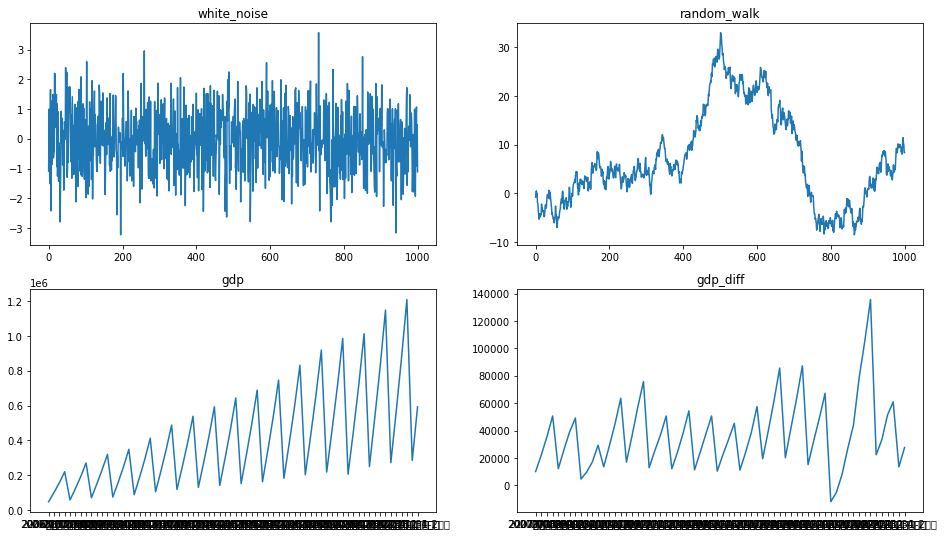

In [100]:
#! pip install akshare -i http://mirrors.aliyun.com/pypi/simple/ --trusted-host=mirrors.aliyun.com  --upgrade
#! conda install pandas numpy scikit-learn matplotlib seaborn 
import numpy as np
import pandas as pd
import akshare as ak
from matplotlib import pyplot as plt

np.random.seed(123)

# -------------- 准备数据 --------------
# 白噪声
white_noise = np.random.standard_normal(size=1000)

# 随机游走
x = np.random.standard_normal(size=1000)
random_walk = np.cumsum(x)

# GDP
df = ak.macro_china_gdp()
df = df.set_index('季度')
# df.index
# # df.index = pd.to_datetime(df.index)
gdp = df['国内生产总值-绝对值'][::-1].astype('float')

# GDP DIFF
gdp_diff = gdp.diff(4).dropna()


# -------------- 绘制图形 --------------

fig, ax = plt.subplots(2, 2,figsize=(16,9))

ax[0][0].plot(white_noise)
ax[0][0].set_title('white_noise')
ax[0][1].plot(random_walk)
ax[0][1].set_title('random_walk')

ax[1][0].plot(gdp)
ax[1][0].set_title('gdp')
ax[1][1].plot(gdp_diff)
ax[1][1].set_title('gdp_diff')

plt.show()


#### 自协方差
![jupyter](./image/自协方差公式.png)


In [105]:
def Autocovariance(ts,k):
    mean = np.mean(ts)
    n = len(ts)
    coef = np.zeros(k+1)
    
    # 循环计算第i阶自协方差
    for i in range(1, k+1):
        A = ts[:-i]
        B = ts[i:]
        r = sum((A-mean)*(B-mean))/(n-k)
        coef[i] = r
#         print(ts[:-i],ts[i:])
    return coef
    
    

    
data = np.array([2,3,4,3,8,7])
print(f"自协方差为：{Autocovariance(data,1)},方差为：{np.var(data)}")
print(f"自相关系数为:{Autocovariance(data,2)/np.var(data)}")

自协方差为：[0.   1.75],方差为：4.916666666666667
自相关系数为:[ 0.          0.44491525 -0.10169492]


#### 自相关系数代码实现
![jupyter](./image/自相关系数.png)

In [104]:
import numpy as np
import statsmodels.api as sm

# 有偏
def acf(ts, k):  
    # 预计算-均先减去均值（原始序列的均值）
    x = np.array(ts) - np.mean(ts)
    
    print(f"x:{x}")
#     print(f"x[:1]:{x[:1]}")

    # 存储自相关系数（[c0,c1,...,ck]）
    coef = np.zeros(k+1)

    # 计算r0原始序列的标准差（有偏:T,无偏:T-k（分子分母可以消掉，这里就省略了除以分母））
    coef[0] = x.dot(x)
    print(f"x.dot(x):{x.dot(x)}")

    # 循环计算第i阶自协方差
    for i in range(1, k+1):
        coef[i] = x[:-i].dot(x[i:])
        print(f"i:{i}")
        print(f"x[:-i]:{x[:-i]} <-> x[i:]:{x[i:]}")
        print(f"x[:-i].dot(x[i:]):{x[:-i].dot(x[i:])}")
        
    
    print(f"coef:{coef} <-> coef[0]:{coef[0]}")
#     print(f"cov(Xt-k,Xt):{sum(x[:-i]*x[i:]),x[:-i].dot(x[i:])}")
    # 返回自相关系数
    return coef / coef[0]


# 无偏
def acf_adjusted(ts, k):
    # 预计算-均先减去均值（原始序列的均值）
    x = np.array(ts) - np.mean(ts)

    # 存储自相关系数（[c0,c1,...,ck]）
    coef = np.zeros(k+1)

    # 序列自协方差
    coef[0] = x.dot(x) / len(x)

    # 循环计算第i阶自协方差
    for i in range(1, k+1):
        coef[i] = x[:-i].dot(x[i:]) / len(x[:-i])

    # 返回自相关系数
    return coef / coef[0]
    
data = np.array([2,3,4,3,8,7])

print('numpy实现自相关系数-----')
print(acf(data, 3))
print('numpy实现无偏自相关系数-----')
print(acf_adjusted(data, 3))

print('statsmodels实现自相关系数>>>>>')
print(sm.tsa.stattools.acf(data, nlags=3, adjusted=False))
print('statsmodels实现无偏自相关系数>>>>>')
print(sm.tsa.stattools.acf(data, nlags=3, adjusted=True))
print(sm.tsa.stattools.pacf(data, nlags=2))

numpy实现自相关系数-----
x:[-2.5 -1.5 -0.5 -1.5  3.5  2.5]
x.dot(x):29.5
i:1
x[:-i]:[-2.5 -1.5 -0.5 -1.5  3.5] <-> x[i:]:[-1.5 -0.5 -1.5  3.5  2.5]
x[:-i].dot(x[i:]):8.75
i:2
x[:-i]:[-2.5 -1.5 -0.5 -1.5] <-> x[i:]:[-0.5 -1.5  3.5  2.5]
x[:-i].dot(x[i:]):-2.0
i:3
x[:-i]:[-2.5 -1.5 -0.5] <-> x[i:]:[-1.5  3.5  2.5]
x[:-i].dot(x[i:]):-2.75
coef:[29.5   8.75 -2.   -2.75] <-> coef[0]:29.5
[ 1.          0.29661017 -0.06779661 -0.09322034]
numpy实现无偏自相关系数-----
[ 1.          0.3559322  -0.10169492 -0.18644068]
statsmodels实现自相关系数>>>>>
[ 1.          0.29661017 -0.06779661 -0.09322034]
statsmodels实现无偏自相关系数>>>>>
[ 1.          0.3559322  -0.10169492 -0.18644068]
[ 1.          0.3559322  -0.26151316]


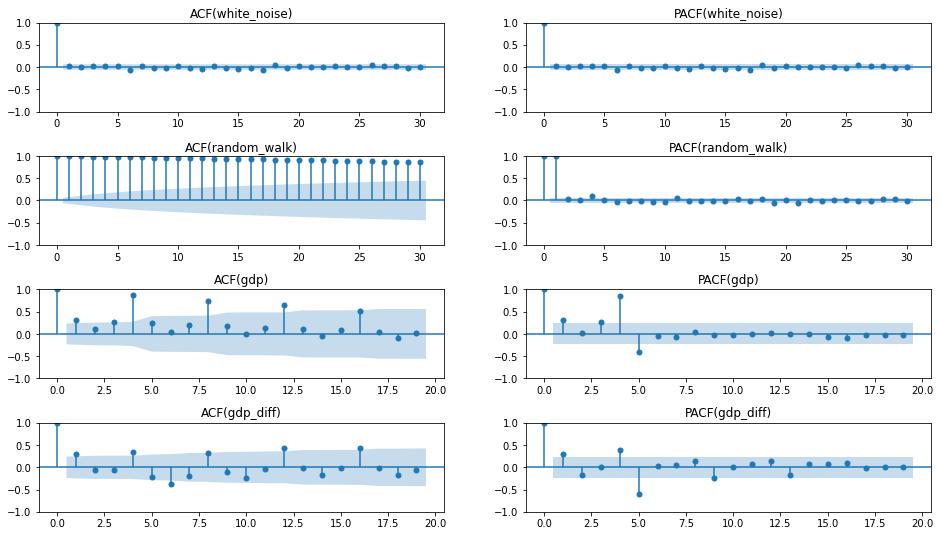

In [99]:
# 数据生成过程在第一个代码块中
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

sns.set_style()
fig, ax = plt.subplots(4, 2,figsize=(16,9))

fig.subplots_adjust(hspace=0.5)

plot_acf(white_noise, ax=ax[0][0])
ax[0][0].set_title('ACF(white_noise)')
plot_pacf(white_noise, ax=ax[0][1])
ax[0][1].set_title('PACF(white_noise)')

plot_acf(random_walk, ax=ax[1][0])
ax[1][0].set_title('ACF(random_walk)')
plot_pacf(random_walk, ax=ax[1][1])
ax[1][1].set_title('PACF(random_walk)')

plot_acf(gdp, ax=ax[2][0])
ax[2][0].set_title('ACF(gdp)')
plot_pacf(gdp, ax=ax[2][1])
ax[2][1].set_title('PACF(gdp)')

plot_acf(gdp_diff, ax=ax[3][0])
ax[3][0].set_title('ACF(gdp_diff)')
plot_pacf(gdp_diff, ax=ax[3][1])
ax[3][1].set_title('PACF(gdp_diff)')

plt.show()

In [106]:
import numpy as np

np.random.seed(123)

white_noise = np.random.standard_normal(size=1000)

x = np.random.standard_normal(size=1000)
random_walk = np.cumsum(x)

def describe(X):
    split = int(len(X) / 2)
    X1, X2 = X[0:split], X[split:]
    mean1, mean2 = X1.mean(), X2.mean()
    var1, var2 = X1.var(), X2.var()
    print('mean1=%f, mean2=%f' % (mean1, mean2))
    print('variance1=%f, variance2=%f' % (var1, var2))

print('white noise sample')
describe(white_noise)

print('random walk sample')
describe(random_walk)

white noise sample
mean1=-0.038644, mean2=-0.040484
variance1=1.006416, variance2=0.996734
random walk sample
mean1=5.506570, mean2=8.490356
variance1=53.911003, variance2=126.866920


### 单位根检验

In [110]:
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import datetime 
import os

endtime = datetime.datetime.now()
starttime = datetime.datetime.now()-datetime.timedelta(minutes=5)
x_data=[]
y_data=[]
data = xlrd.open_workbook('~/Documents/淮职算法课准备/时间序列分析/database/test.xlsx')
table = data.sheets()[0]
cap = table.col_values(2)
cap1 = table.col_values(0)
for i in range(1,len(cap)):
    x_data.append(cap1[i])
    y_data.append(cap[i])

adf_seq = np.array(y_data)
dftest = adfuller(adf_seq,autolag='AIC')
if dftest[1]>0.05:
    print(starttime)
    print(endtime)
    print(dftest)
    print("当前接通率不平稳")
else:
    print(dftest[1])
    print(starttime)
    print(endtime)
    print(dftest)
    print("当前接通率平稳")

#画折线图
#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.plot(x_data, y_data, 'g-s')
plt.title('接通率')
plt.legend()

plt.xlabel('id')
plt.ylabel('接通率')
plt.show()

XLRDError: Excel xlsx file; not supported